In [2]:
# Import library
import random
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Simple richard-dawkin-weasel

In [3]:
# Fitness calculation, return the match rate between a and b 
def similar(a, b):
    n = len(a)
    count = 0 
    for i in range(n):
        if a[i] != b[i]:
            count += 1 
    return (n -count)/n

In [4]:
# Auxiliary function for richard-dawkin-weasel
# return a random letter other than the input
def rand_letter(string):
    while True:
        select = random.choice('abcdefghijklmnopqrstuvwxyz ')
        if select != string:
            break
    return select

def random_char(y):
       return ''.join(random.choice(string.ascii_lowercase) for x in range(y))

In [5]:
# Return the list of literation number, and its fitness in each step
def RDW (string) :
    liter = 1
    lit_num = []
    fitness = []
    target_length = len(string)
    # Initialize a random string
    current_string = "".join([random.choice("abcdefghijklmnopqrstuvwxyz ") for i in range(len(string))])
    while current_string != string:
        current_string = list(current_string)
        for ind in range(len(current_string)):
            if current_string[ind] != string[ind]:
                current_string[ind] = rand_letter(current_string[ind])
        # Increment counter
        lit_num.append(liter - 1)
        fitness.append(similar(string,current_string))
        liter += 1
        current_string = "".join(current_string)
    return lit_num, fitness

In [6]:
# Implemenation of Richard-dawkin weasel
steps = []
for i in range(20):
    steps.append(len(RDW('me thinks it is like a weasel')[0]))
print(steps)
print("The steps required to match 'me thinks it is like a weasel'")
print("mean:",np.mean(steps))
print("sd:",np.var(steps)**(1/2))

[114, 69, 102, 128, 99, 105, 118, 81, 94, 92, 90, 76, 81, 105, 70, 182, 82, 73, 72, 149]
The steps required to match 'me thinks it is like a weasel'
mean: 99.1
sd: 27.985531976362356


### Richard-dawkin-weasel GA

In [7]:
# Generate candidates for selection
# Roulette wheel selection by probability 
def roulette_selection(population,scores, n):
    new_population = []
    if (np.sum(scores) == 0):
            new_population += list(np.random.choice(population, replace=True, size=n))
            return new_population
    prob = scores / np.sum(scores)
    if n > 0:
        new_population += list(np.random.choice(population ,p= prob, replace=True, size=n))
    return new_population

In [8]:
# return the best elements
def Elitism (population,scores):
    max_mark = max(scores)
    indices = [index for index, val in enumerate(scores) if val == max_mark]
    max_pool = list(set([population[i] for i in (indices)]))
    return max_pool

In [9]:
# mutate the string by probability
def mutation(string, prob):
    length = len(string)
    for i in range(length):
        if random.random() < prob:
            string = string[:i] + rand_letter(string[i]) + string[i+1:]
    return string

In [10]:
# generate a child from two strings
def uniform_cross (str1,str2):
    str3 = ''
    for i in range(len(str1)):
        if random.random() > 0.5:
            str3 += str1[i]
        else :
            str3 += str2[i]
    return str3

In [11]:
# genetic algorithm
def GA(string):
    population_size = 20
    population = []
    n = len(string)
    literation = 0
    fitness = []
    for i in range(population_size):
        population.append(random_char(n))
    
    while True:
        scores = [similar(x,string) for x in population]
        fitness.append(max(scores))
        if 1 in scores:
            break
        literation += 1
        # select best subjects
        best = Elitism(population, scores)
        # selection best parents by proportion of 0.6
        max_n = int(len(population) * 0.6)
        new_population = list(np.random.choice(best, replace=True, size=max_n))
        # calculate the numbers of population needed to be filled
        fill_n = population_size - max_n
        for i in range(fill_n):
            # Cross uniform 
            parents = roulette_selection(population,scores,2)
            child = uniform_cross(parents[0],parents[1])
            # Mutation rate
            child = mutation(child,0.01)
            new_population.append(child)
        population = new_population
    return fitness, literation

In [12]:
# Implemenation of Richard-dawkin weasel GA
result = []
for i in range(20):
    result.append(GA('me thinks')[1])
print(result)
print("mean:",np.mean(result))
print("sd:",np.var(result)**(1/2))

[1650, 1894, 625, 355, 458, 840, 605, 726, 380, 1721, 818, 1360, 1935, 277, 482, 359, 213, 1397, 491, 1009]
mean: 879.75
sd: 557.625042031


### How many time steps are required to match strings of different length?

Simple algorithm

In [14]:
# Measure the lengths for points 5, 10, 15, 20, 25, 30
# for each lengths we run 30 experiemnts and get the mean as result
lengths = range(5,35,5)
number = []
literation = []
for i in lengths:
    for j in range(50):
        number.append(i)
        literation.append(len(RDW(random_char(i))[0]))

In [15]:
# Finding the steps
df = pd.DataFrame({ 'length' : number,
                     'steps': literation
                   })
simple_step = df.groupby('length').mean()
print(df.head(5))
simple_step

   length  steps
0       5     50
1       5     36
2       5     79
3       5     28
4       5    115


,steps
length,
5,59.98
10,67.36
15,90.34
20,94.84
25,99.80
30,106.14


Text(0,0.5,'time steps')

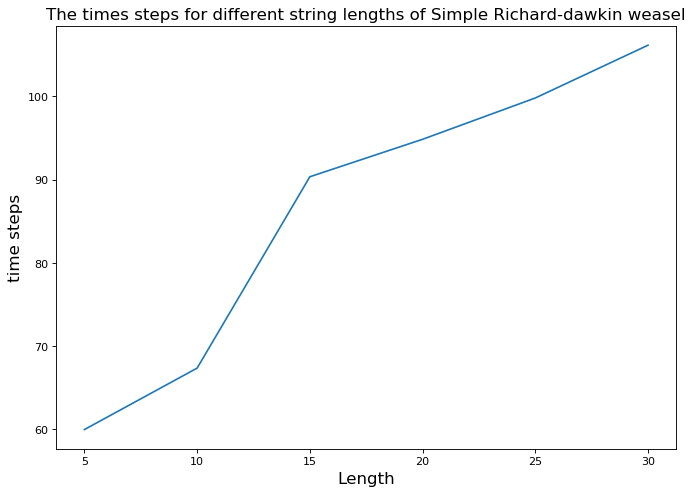

In [16]:
plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(simple_step)
plt.title("The times steps for different string lengths of Simple Richard-dawkin weasel", fontsize=15)
plt.xlabel("Length", fontsize=15)
plt.ylabel("time steps", fontsize=15)

GA

In [17]:
# Measure the lengths for points 5, 10, 15, 20, 25, 30
# for each lengths we run 30 experiemnts and get the mean as result
lengths = range(5,35,5)
number = []
literation = []
for i in lengths:
    for j in range(50):
        number.append(i)
        literation.append(GA(random_char(i))[1])

In [18]:
# Finding the steps
df2 = pd.DataFrame({ 'length' : number,
                     'steps': literation
                   })
GA_step = df2.groupby('length').mean()
GA_step

,steps
length,
5,556.02
10,807.04
15,1052.10
20,1203.06
25,1273.32
30,1446.24


Text(0,0.5,'time steps')

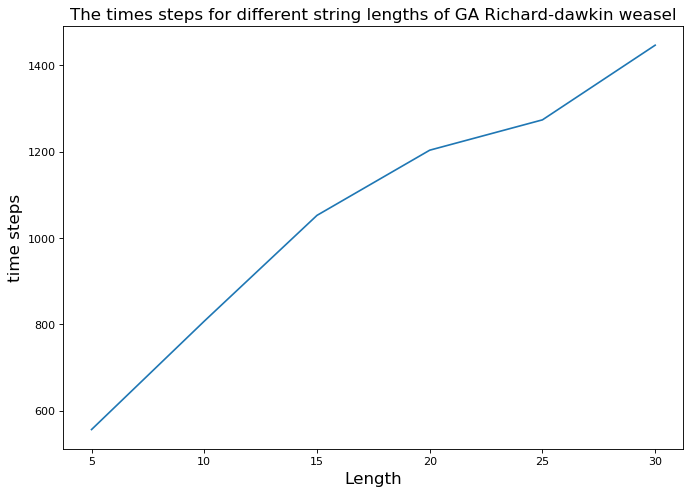

In [19]:
plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(GA_step)
plt.title("The times steps for different string lengths of GA Richard-dawkin weasel", fontsize=15)
plt.xlabel("Length", fontsize=15)
plt.ylabel("time steps", fontsize=15)

###  How does fitness increase while the algorithm runs?

In [20]:
# printing the data for demonstration, simple algorithm of string length 5
np.array(RDW(random_char(5))[1])

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0.2,  0.2,  0.2,  0.2,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,
        0.4,  0.6,  0.6,  0.6,  0.8,  0.8,  0.8,  0.8,  0.8,  1. ])

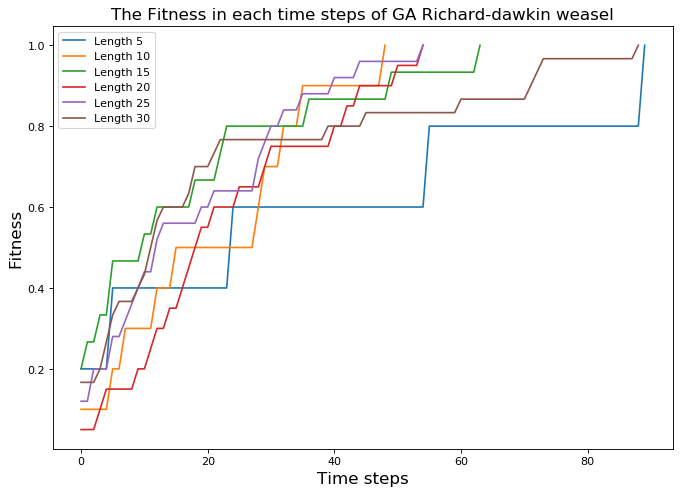

In [21]:
# Finding the fitness 
random.seed(1)
# for a length of 30. Let's do the 5 times
line1 = np.array(RDW(random_char(5))[1])
line2 = np.array(RDW(random_char(10))[1])
line3 = np.array(RDW(random_char(15))[1])
line4 = np.array(RDW(random_char(20))[1])
line5 = np.array(RDW(random_char(25))[1])
line6 = np.array(RDW(random_char(30))[1])
plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(line1, label='Length 5')
plt.plot(line2,label='Length 10')
plt.plot(line3, label = 'Length 15')
plt.plot(line4, label = 'Length 20')
plt.plot(line5, label = 'Length 25')
plt.plot(line6, label = 'Length 30')
plt.title("The Fitness in each time steps of GA Richard-dawkin weasel", fontsize=15)
plt.xlabel("Time steps", fontsize=15)
plt.ylabel("Fitness", fontsize=15)
plt.legend()

In [22]:
line_list = []
max_len = 0 
runs = 50
for i in range(runs):
    fitness = np.array(RDW(random_char(5))[1])
    line_list.append(fitness)
    if len(fitness) > max_len:
        max_len = len(fitness)
for i in range (runs):
    line_list[i] = np.pad(line_list[i],(0, max_len - len(line_list[i])),mode='constant', constant_values=1)

In [23]:
line_list2 = []
max_len2 = 0 
runs = 50
for i in range(runs):
    fitness = np.array(GA(random_char(5))[0])
    line_list2.append(fitness)
    if len(fitness) > max_len:
        max_len = len(fitness)
for i in range (runs):
    line_list2[i] = np.pad(line_list2[i],(0, max_len - len(line_list2[i])),mode='constant', constant_values=1)

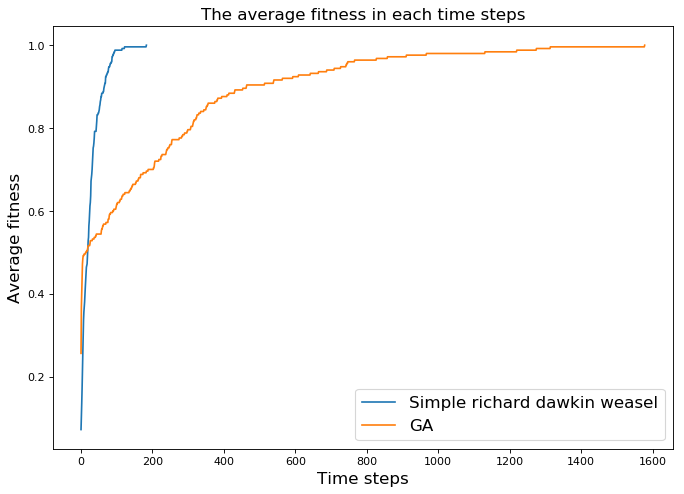

In [24]:
# Compare the performance
plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(np.mean(line_list,axis=0), label = 'Simple richard dawkin weasel')
plt.plot(np.mean(line_list2,axis=0), label = 'GA')
plt.title("The average fitness in each time steps", fontsize=15)
plt.xlabel("Time steps", fontsize=15)
plt.ylabel("Average fitness", fontsize=15)
plt.legend(fontsize=15)

GA

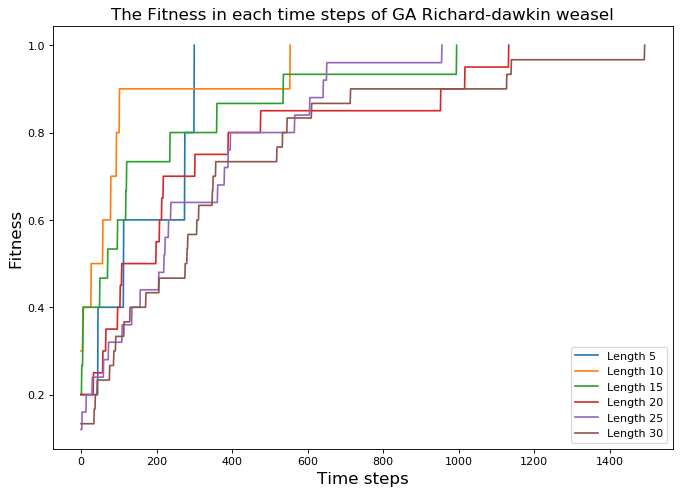

In [25]:
# Finding the fitness `
random.seed(1)
# for a length of 30. Let's do the 5 times
line1 = np.array(GA(random_char(5))[0])#
line2 = np.array(GA(random_char(10))[0])
line3 = np.array(GA(random_char(15))[0])
line4 = np.array(GA(random_char(20))[0])
line5 = np.array(GA(random_char(25))[0])
line6 = np.array(GA(random_char(30))[0])
plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(line1, label='Length 5')
plt.plot(line2,label='Length 10')
plt.plot(line3, label = 'Length 15')
plt.plot(line4, label = 'Length 20')
plt.plot(line5, label = 'Length 25')
plt.plot(line6, label = 'Length 30')
plt.title("The Fitness in each time steps of GA Richard-dawkin weasel", fontsize=15)
plt.xlabel("Time steps", fontsize=15)
plt.ylabel("Fitness", fontsize=15)
plt.legend()

###   The range of variation in the time taken to reach a perfect match?

Simple Richard-dawkin wease

Text(0.5,0.98,'')

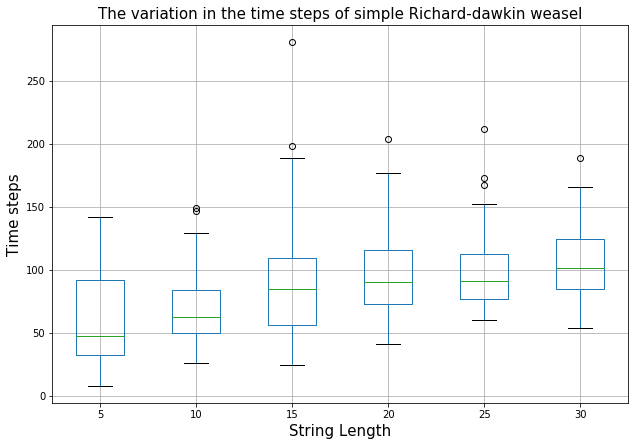

In [26]:
df.boxplot(by = 'length',figsize=(10,7))
plt.title("The variation in the time steps of simple Richard-dawkin weasel", fontsize=15)
plt.xlabel("String Length", fontsize=15)
plt.ylabel("Time steps", fontsize=15)
plt.suptitle("")

In [27]:
# print variance
df.groupby(by='length').var()

,steps
length,
5,1353.162857
10,737.296327
15,2131.698367
20,997.647347
25,1028.693878
30,870.816735


In [28]:
a = []
for j in range(10000):
    a.append(len(RDW('abd')[0]))

In [29]:
np.var(a)

881.97291310999992

GA

Text(0.5,0.98,'')

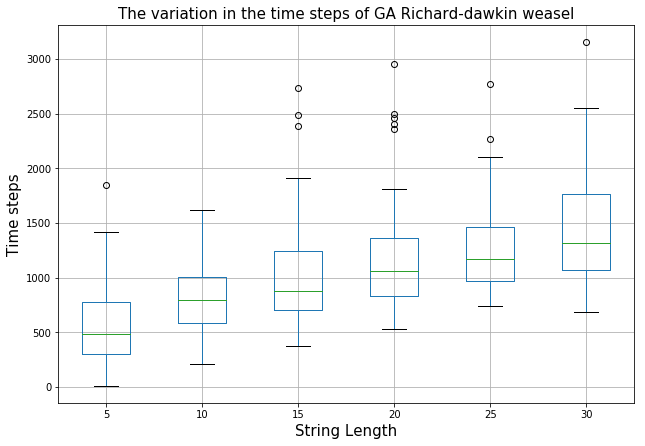

In [30]:
df2.boxplot(by = 'length',figsize=(10,7))
plt.title("The variation in the time steps of GA Richard-dawkin weasel", fontsize=15)
plt.xlabel("String Length", fontsize=15)
plt.ylabel("Time steps", fontsize=15)
plt.suptitle("")

In [31]:
np.mean(df2.groupby(by='length').var().values)

211499.51775510202

In [32]:
df2.groupby(by='length').var()

,steps
length,
5,154829.122041
10,96448.773878
15,288117.234694
20,298820.261633
25,174509.691429
30,256272.022857


###  Which algorithm performs better on this task? 

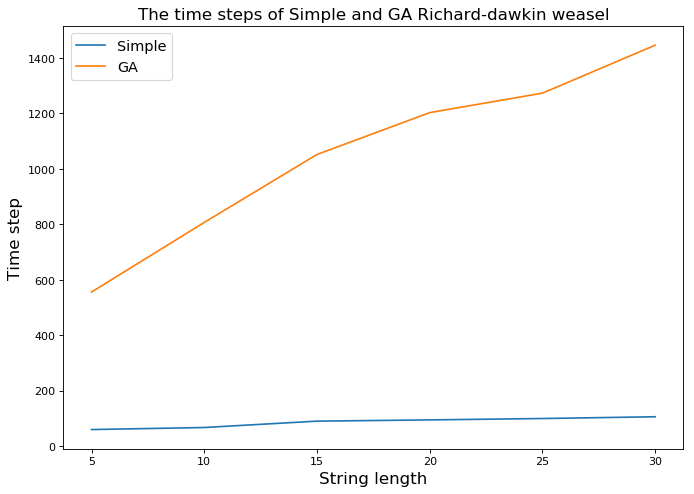

In [33]:
plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(df.groupby('length').mean(),label ='Simple')
plt.plot(df2.groupby('length').mean(),label='GA')
plt.title("The time steps of Simple and GA Richard-dawkin weasel", fontsize=15)
plt.xlabel("String length", fontsize=15)
plt.ylabel("Time step", fontsize=15)
plt.legend(fontsize=13)